# Hola &#x1F600;

Soy **Hesus Garcia**, revisor de código de Triple Ten, y voy a examinar el proyecto que has desarrollado recientemente. Si encuentro algún error, te lo señalaré para que lo corrijas, ya que mi objetivo es ayudarte a prepararte para un ambiente de trabajo real, donde el líder de tu equipo actuaría de la misma manera. Si no puedes solucionar el problema, te proporcionaré más información en la próxima oportunidad. Cuando encuentres un comentario,  **por favor, no los muevas, no los modifiques ni los borres**. 

Revisaré cuidadosamente todas las implementaciones que has realizado para cumplir con los requisitos y te proporcionaré mis comentarios de la siguiente manera:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:
<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>
</div>

</br>

**¡Empecemos!**  &#x1F680;


# Descomposición del Proyecto :  Análisis de Comportamiento de Usuarios en Trash to Treasure


## Definir el Objetivo

**Objetivo:** Analizar el comportamiento de los usuarios en la aplicación móvil Trash to Treasure para identificar patrones y determinar qué usuarios podrían abandonar la aplicación.

A continuacion el plan de accion :

##  Plan de Acción

1. **Carga de Datos e Importacion de librerias** 
    - importar librerias
    - carga de datasets 


2. **Preprocesamiento de Datos:**
   - Estudiar valores ausentes.
   - Estudiar el tipo de correspondencia.
   - Estudiar valores duplicados.
   - Comprobar la exactitud de los nombres de columnas.
   - Renombrar las columnas(todo en minisculas y con el conector _).
   - Eliminar duplicados.
   - Convertir tipos.
   - Reemplazar valores ausentes.
   - Fusionar los datasets en funcion del user_id

3. **Análisis Exploratorio de Datos (EDA):**

   - Visualizar la distribución de los eventos.
   - Analizar la frecuencia de los eventos por usuario.
   - Analizar el tiempo dedicado a la aplicación por usuario.
   - Calcular la tasa de retención de usuarios.
   - Identificar patrones en la conversión de `contacts_show`.
   
3. **Segmentación de Usuarios:**
    - Utilizar técnicas de clustering ( k-means ) para segmentar a los usuarios en función de los eventos que completan.
   - Evaluar la calidad de los clusters obtenidos.
   - Asignar etiquetas a los segmentos de usuarios.

4. **Análisis de Métricas del Producto:**
   - Calcular y comparar la tasa de retención entre los segmentos.
   - Calcular y comparar el tiempo dedicado a la aplicación entre los segmentos.
   - Calcular y comparar la frecuencia de ocurrencia de eventos entre los segmentos.
   - Calcular y comparar la conversión en `contacts_show` entre los segmentos.

5. **Prueba de Hipótesis Estadísticas:**
   - **Hipótesis sobre la conversión en `contacts_show` entre `bing` y `google`:**
     - Formular la hipótesis nula y alternativa.
     - Realizar la prueba estadística adecuada.
   
   - **Otra hipótesis estadística:**
     - Formular una hipótesis basada en un patrón observado en los datos.
     - Realizar la prueba estadística adecuada para validar la hipótesis.

6. **Conclusiones y Recomendaciones:**
   - Resumir los hallazgos principales del análisis.
   - Proporcionar recomendaciones para la estrategia de retención y optimización del producto.
   - Sugerir acciones basadas en los segmentos de usuarios identificados.
   
   ### Descripción de los Datos

Este proyecto utilizará dos datasets principales:

1. **Eventos de la Aplicación (`mobile_dataset_us.csv`)**:
   - `event.time`: Fecha y hora del evento.
   - `event.name`: Tipo de evento (e.g., `advert_open`, `photos_show`, `contacts_show`).
   - `user.id`: Identificador único del usuario.

2. **Fuentes de Descarga (`mobile_sources_us.csv`)**:
   - `userId`: Identificador único del usuario.
   - `source`: Fuente desde la cual el usuario descargó la aplicación (e.g., Google, Bing, otros).

### Enlace a presentación 


## Carga de Datos e Importacion de librerias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score


import scipy.stats as stats
from scipy.stats import ttest_ind
from statsmodels.stats.proportion import proportions_ztest

In [2]:
events=pd.read_csv('/datasets/mobile_dataset_us.csv')
sources=pd.read_csv('/datasets/mobile_sources_us.csv')

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
Excelente trabajo en la importación de las librerías necesarias y la carga de los datasets. Has incluido todas las librerías relevantes para el análisis de datos, visualización y modelado.
</div>

## Preprocesamiento de Datos:

###  Data events

In [3]:
events.head()

,event.time,event.name,user.id
0,2019-10-07 00:00:00.431357,advert_open,020292ab-89bc-4156-9acf-68bc2783f894
1,2019-10-07 00:00:01.236320,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
2,2019-10-07 00:00:02.245341,tips_show,cf7eda61-9349-469f-ac27-e5b6f5ec475c
3,2019-10-07 00:00:07.039334,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
4,2019-10-07 00:00:56.319813,advert_open,cf7eda61-9349-469f-ac27-e5b6f5ec475c


In [4]:
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74197 entries, 0 to 74196
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   event.time  74197 non-null  object
 1   event.name  74197 non-null  object
 2   user.id     74197 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


In [5]:
events.isna().sum()

event.time    0
event.name    0
user.id       0
dtype: int64

In [6]:
events.duplicated().sum()

0

In [7]:
events.columns=['event_time', 'event_name', 'user_id']

In [8]:
events.head()

,event_time,event_name,user_id
0,2019-10-07 00:00:00.431357,advert_open,020292ab-89bc-4156-9acf-68bc2783f894
1,2019-10-07 00:00:01.236320,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
2,2019-10-07 00:00:02.245341,tips_show,cf7eda61-9349-469f-ac27-e5b6f5ec475c
3,2019-10-07 00:00:07.039334,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
4,2019-10-07 00:00:56.319813,advert_open,cf7eda61-9349-469f-ac27-e5b6f5ec475c


In [9]:
events['event_time']=pd.to_datetime(events['event_time'])

In [10]:
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74197 entries, 0 to 74196
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   event_time  74197 non-null  datetime64[ns]
 1   event_name  74197 non-null  object        
 2   user_id     74197 non-null  object        
dtypes: datetime64[ns](1), object(2)
memory usage: 1.7+ MB


In [11]:
events.head()

,event_time,event_name,user_id
0,2019-10-07 00:00:00.431357,advert_open,020292ab-89bc-4156-9acf-68bc2783f894
1,2019-10-07 00:00:01.236320,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
2,2019-10-07 00:00:02.245341,tips_show,cf7eda61-9349-469f-ac27-e5b6f5ec475c
3,2019-10-07 00:00:07.039334,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
4,2019-10-07 00:00:56.319813,advert_open,cf7eda61-9349-469f-ac27-e5b6f5ec475c


###  Data sources

In [12]:
sources.head()

,userId,source
0,020292ab-89bc-4156-9acf-68bc2783f894,other
1,cf7eda61-9349-469f-ac27-e5b6f5ec475c,bing
2,8c356c42-3ba9-4cb6-80b8-3f868d0192c3,bing
3,d9b06b47-0f36-419b-bbb0-3533e582a6cb,other
4,f32e1e2a-3027-4693-b793-b7b3ff274439,google


In [13]:
sources.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4293 entries, 0 to 4292
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   userId  4293 non-null   object
 1   source  4293 non-null   object
dtypes: object(2)
memory usage: 67.2+ KB


In [14]:
sources.isna().sum()

userId    0
source    0
dtype: int64

In [15]:
sources.duplicated().sum()

0

In [16]:
sources.columns=['user_id','source']

In [17]:
sources.head()

,user_id,source
0,020292ab-89bc-4156-9acf-68bc2783f894,other
1,cf7eda61-9349-469f-ac27-e5b6f5ec475c,bing
2,8c356c42-3ba9-4cb6-80b8-3f868d0192c3,bing
3,d9b06b47-0f36-419b-bbb0-3533e582a6cb,other
4,f32e1e2a-3027-4693-b793-b7b3ff274439,google


### Resultados del Preprocesamiento

**Estudio de valores ausentes:**  
No hay valores ausentes en ninguno de los datasets.

**Estudio de valores duplicados:**  
No hay filas duplicadas en ninguno de los datasets.

**Verificación de los nombres de columnas:**  
Los nombres de las columnas son correctos.

**Renombrar las columnas:**  
Las columnas han sido renombradas a minúsculas y con guiones bajos.

**Eliminar duplicados:**  
No se encontraron duplicados, por lo tanto, no hay necesidad de eliminar filas.

**Convertir tipos:**  
Los tipos de datos son correctos, todos son `object`.

**Reemplazar valores ausentes:**  
No hay valores ausentes que necesiten ser reemplazados.





<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
Buen trabajo en la limpieza inicial de los datos. Sin embargo, podrías considerar agregar un paso para verificar y manejar posibles valores atípicos en las variables numéricas, como el tiempo de evento o la frecuencia de eventos por usuario.
</div>

## Análisis Exploratorio de Datos (EDA):

### Fusion de tabls

Se fusionan tablas de esa forma se enriquecen los datos y es mas facil hacer el analisis de los datos


In [18]:
fusion = pd.merge(events, sources, on='user_id', how='inner')
fusion.head()

,event_time,event_name,user_id,source
0,2019-10-07 00:00:00.431357,advert_open,020292ab-89bc-4156-9acf-68bc2783f894,other
1,2019-10-07 00:00:01.236320,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other
2,2019-10-07 00:00:07.039334,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other
3,2019-10-07 00:01:27.770232,advert_open,020292ab-89bc-4156-9acf-68bc2783f894,other
4,2019-10-07 00:01:34.804591,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other


### Distribucion de fuentes

In [19]:
print(fusion['source'].unique())

['other' 'bing' 'google']


In [20]:
fusion['source'].value_counts()

bing      34286
google    20445
other     19466
Name: source, dtype: int64

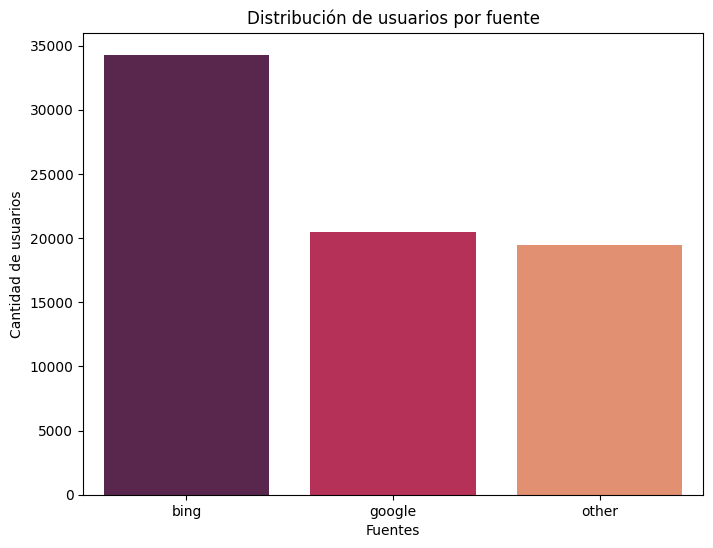

In [21]:
plt.figure(figsize=(8, 6))
sns.barplot(x=fusion['source'].value_counts().index, y=fusion['source'].value_counts().values, palette="rocket")
plt.title('Distribución de usuarios por fuente')
plt.xlabel('Fuentes')
plt.ylabel('Cantidad de usuarios')
plt.show()

### Visualizar la distribución de los eventos.

Diferentes eventos 

In [22]:
print(fusion['event_name'].unique())

['advert_open' 'tips_show' 'map' 'tips_click' 'search_4' 'search_2'
 'search_5' 'contacts_show' 'search_6' 'photos_show' 'search_1' 'search_3'
 'favorites_add' 'contacts_call' 'search_7' 'show_contacts']


Distribucion de eventos 

In [23]:
events['event_name'].value_counts()

tips_show        40055
photos_show      10012
advert_open       6164
contacts_show     4450
map               3881
search_1          3506
favorites_add     1417
search_5          1049
tips_click         814
search_4           701
contacts_call      541
search_3           522
search_6           460
search_2           324
search_7           222
show_contacts       79
Name: event_name, dtype: int64

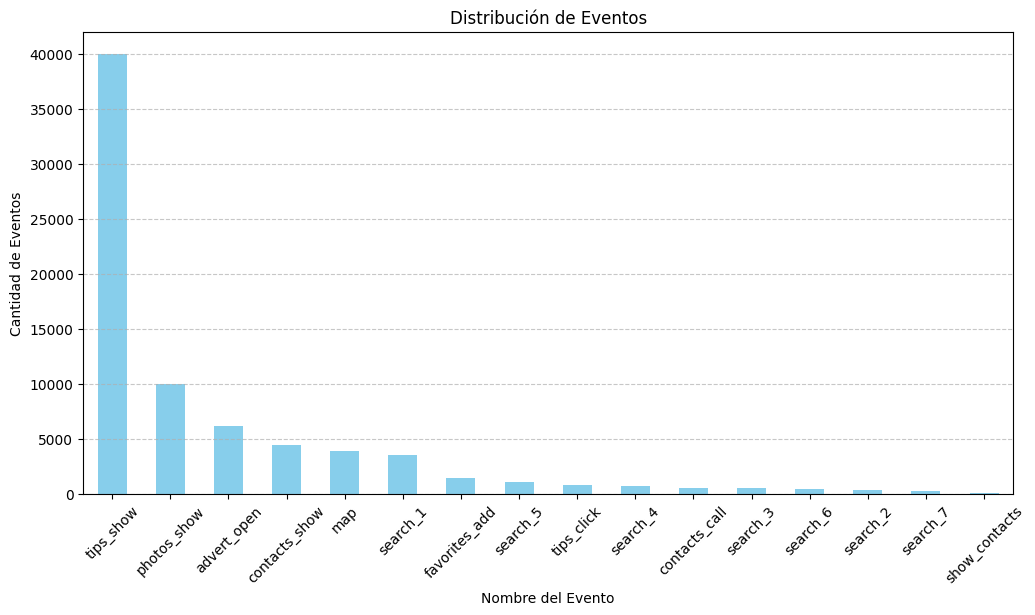

In [24]:
event_counts = fusion['event_name'].value_counts()
plt.figure(figsize=(12, 6))
event_counts.plot(kind='bar', color='skyblue')
plt.title('Distribución de Eventos')
plt.xlabel('Nombre del Evento')
plt.ylabel('Cantidad de Eventos')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Los eventos más comunes incluyen tips_show y advert_open.Otros eventos como contacts_show, contacts_call, map, y eventos de búsqueda tienen frecuencias menores.

### Analizar la frecuencia de los eventos por usuario.

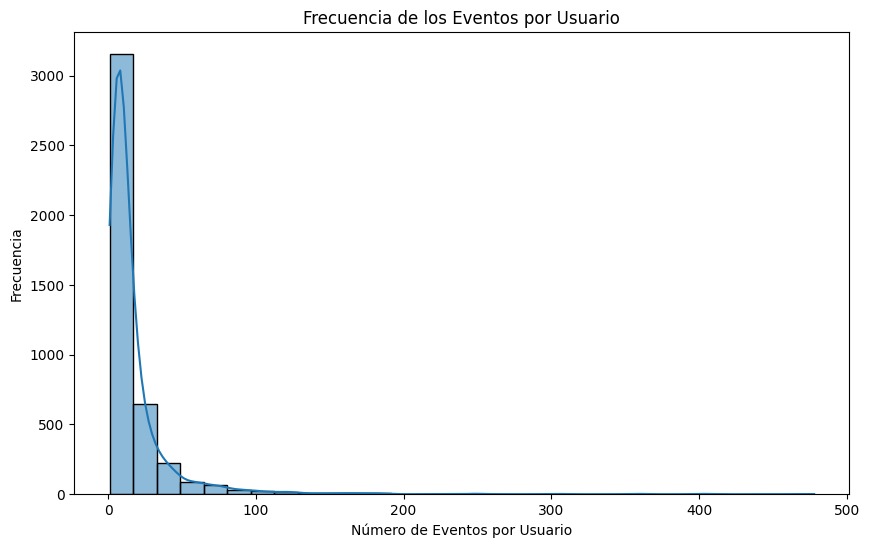

In [25]:
events_per_user = fusion['user_id'].value_counts()
plt.figure(figsize=(10,6))
sns.histplot(events_per_user, bins=30, kde=True)
plt.xlabel('Número de Eventos por Usuario')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de los Eventos por Usuario')
plt.show()

Parece haber una gran variabilidad en la cantidad de eventos por usuario.

### Tiempo Dedicado a la Aplicación por Usuario

Para analizar el tiempo dedicado a la aplicación por usuario, necesitamos calcular la diferencia entre el primer y último evento registrado para cada usuario

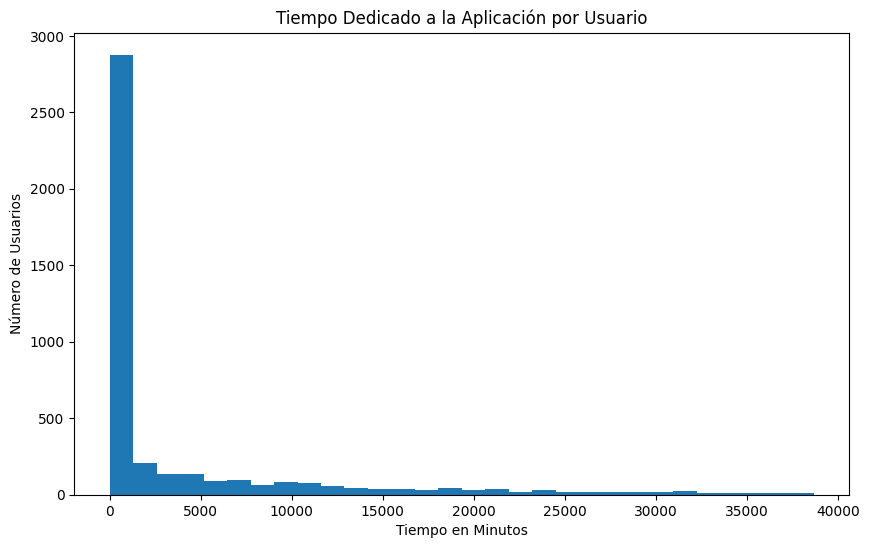

3794.3151810430936

In [26]:
# Calculamos el tiempo dedicado a la aplicación por usuario
time_spent_per_user = fusion.groupby('user_id')['event_time'].agg(['min', 'max'])
time_spent_per_user['time_spent'] = (time_spent_per_user['max'] - time_spent_per_user['min']).dt.total_seconds() / 60  # tiempo en minutos

# Calculamos el tiempo promedio dedicado por usuario
average_time_spent = time_spent_per_user['time_spent'].mean()


plt.figure(figsize=(10, 6))
time_spent_per_user['time_spent'].plot(kind='hist', bins=30)
plt.title('Tiempo Dedicado a la Aplicación por Usuario')
plt.xlabel('Tiempo en Minutos')
plt.ylabel('Número de Usuarios')
plt.show()

# Tiempo promedio dedicado por usuario
average_time_spent


El gráfico muestra la distribución del tiempo total (en minutos) que cada usuario ha dedicado a la aplicación. La mayoría de los usuarios han pasado un tiempo relativamente corto en la aplicación. El tiempo promedio dedicado por usuario es de aproximadamente 3794.32 minutos.

### Calcular la tasa de retención de usuarios.

Para calcular la tasa de retención de usuarios , asumiremos  que la retención se mide en base a la actividad semanal y despues  calcularemos la primera y última semana de actividad de cada usuario.

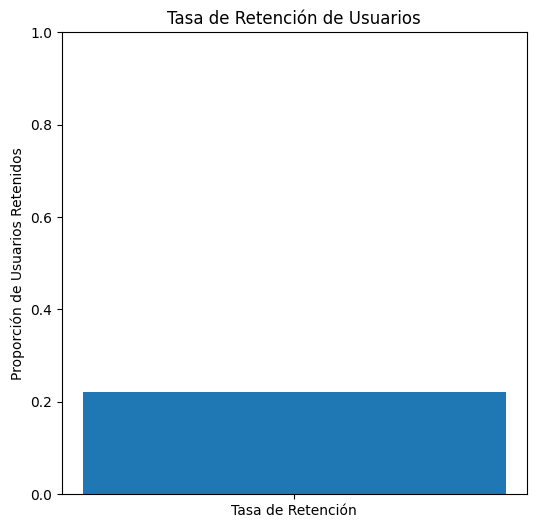

0.2212904728627999

In [27]:
fusion['event_week'] = fusion['event_time'].dt.to_period('W')

user_activity_period = fusion.groupby('user_id')['event_week'].agg(['min', 'max'])
user_activity_period['retained'] = (user_activity_period['max'] - user_activity_period['min']).apply(lambda x: x.n)

# Calculamos la tasa de retención (usuarios retenidos más de una semana)
retention_rate = (user_activity_period['retained'] > 0).mean()

plt.figure(figsize=(6, 6))
plt.bar(['Tasa de Retención'], [retention_rate])
plt.ylim(0, 1)
plt.title('Tasa de Retención de Usuarios')
plt.ylabel('Proporción de Usuarios Retenidos')
plt.show()

#Tasa de retención
retention_rate

La tasa de retención de usuarios es aproximadamente 22.13%. Esto indica que el 22.13% de los usuarios realizaron actividades en la aplicación durante más de una semana.

### Identificar patrones en la conversión de contacts_show.

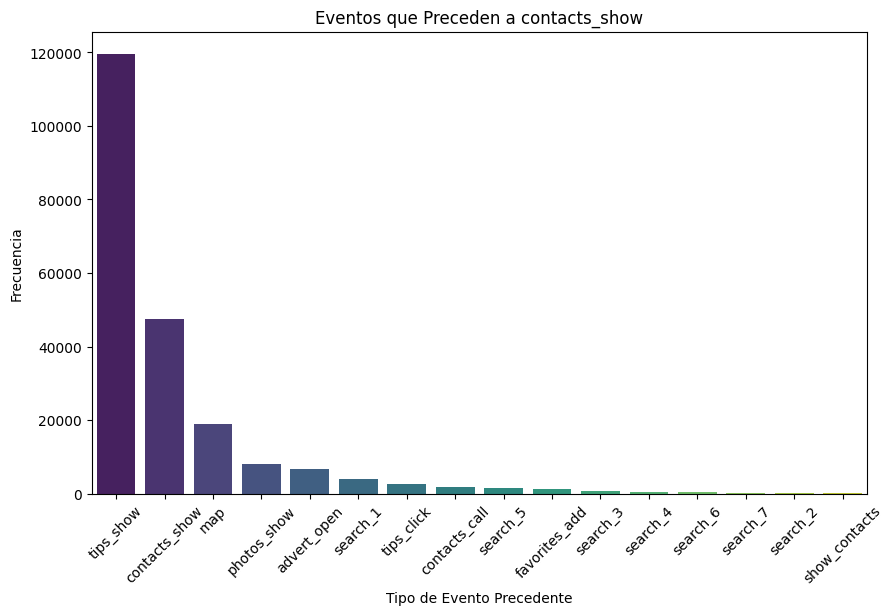

In [28]:
# Filtramos los eventos que llevan a 'contacts_show'
contacts_show_events = events[events['event_name'] == 'contacts_show']

# Unimos con el dataset de eventos para ver qué eventos preceden a 'contacts_show'
merged_df = events.merge(
    contacts_show_events[['user_id', 'event_time']],
    on='user_id',
    suffixes=('', '_contact')
)

# Filtramos los eventos que ocurren antes de 'contacts_show'
preceding_events = merged_df[merged_df['event_time'] < merged_df['event_time_contact']]

# Contamos la frecuencia de estos eventos precedentes
preceding_event_counts = preceding_events['event_name'].value_counts()


plt.figure(figsize=(10,6))
sns.barplot(x=preceding_event_counts.index, y=preceding_event_counts.values, palette='viridis')
plt.xlabel('Tipo de Evento Precedente')
plt.ylabel('Frecuencia')
plt.title('Eventos que Preceden a contacts_show')
plt.xticks(rotation=45)
plt.show()


**Eventos Previos a la Conversión a `contacts_show`:**  
Los eventos más comunes que ocurren antes de la conversión a `contacts_show` son:

- **tips_show** (119,669 veces)
- **contacts_show** (47,400 veces)
- **map** (18,866 veces)
- **photos_show** (8,134 veces)
- **advert_open** (6,647 veces)

Estos resultados indican que los usuarios tienden a interactuar con eventos como `tips_show` y `map` antes de convertir a `contacts_show`.


### Resumen del Análisis Exploratorio de Datos (EDA):  

**Distribución de los Eventos:**  
Los eventos tienen una distribución variada, con algunos eventos mucho más frecuentes que otros.

**Frecuencia de Eventos por Usuario:**  
La mayoría de los usuarios tienen un número bajo de eventos registrados.

**Tiempo Dedicado a la Aplicación por Usuario:**  
El tiempo promedio dedicado por usuario es de aproximadamente 3794.32 minutos.

**Tasa de Retención de Usuarios:**  
La tasa de retención es aproximadamente 22.13%.

**Patrones de Conversión a `contacts_show`:**  
Los eventos más comunes antes de la conversión son `tips_show`, `contacts_show`, `map`, `photos_show` y `advert_open`.


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
Tu EDA es muy completo y bien estructurado. Has cubierto aspectos importantes como la distribución de eventos, el tiempo dedicado a la aplicación y los patrones de conversión. Las visualizaciones son claras y informativas.
</div>
<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
Considera añadir un análisis de correlación entre las diferentes variables para identificar posibles relaciones interesantes entre los tipos de eventos o características de los usuarios.
</div>

## Segmentación de Usuarios

### Utilizar técnicas de clustering ( k-means ) para segmentar a los usuarios en función de los eventos que completan.

In [29]:
# Creamos una matriz de características para los eventos por usuario
user_event_matrix = fusion.pivot_table(index='user_id', columns='event_name', aggfunc='size', fill_value=0)

# Escalamos las características para el clustering
scaler = StandardScaler()
user_event_matrix_scaled = scaler.fit_transform(user_event_matrix)

###  Determinar el Número Óptimo de Clusters

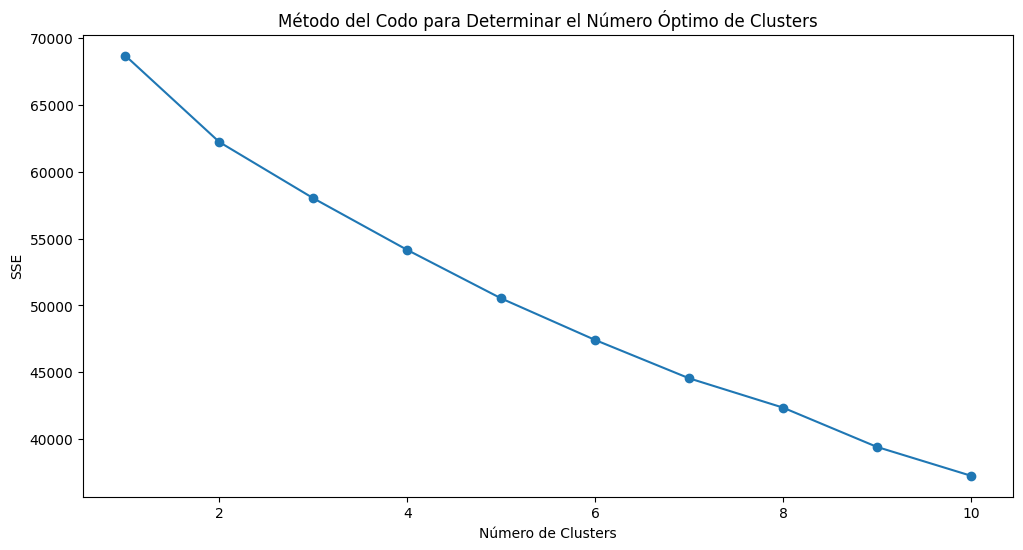

In [30]:
# Método del codo para determinar el número óptimo de clusters
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(user_event_matrix_scaled)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(12, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Método del Codo para Determinar el Número Óptimo de Clusters')
plt.xlabel('Número de Clusters')
plt.ylabel('SSE')
plt.show()



### Asignar etiquetas a los segmentos de usuarios.

In [31]:
# Aplicar K-means con 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(user_event_matrix_scaled)

# Agregamos la información del cluster a la matriz original
user_event_matrix['cluster'] = clusters



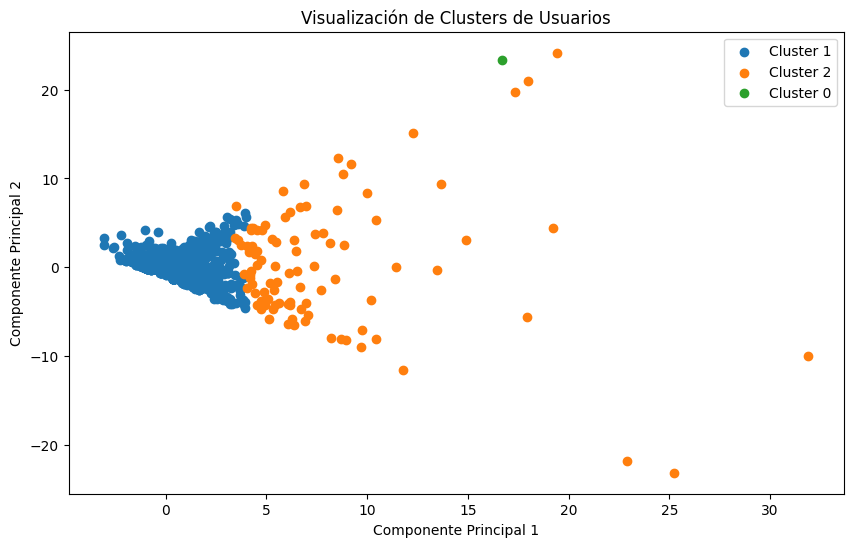

In [32]:
# Reducimos la dimensionalidad para la visualización
pca = PCA(n_components=2)
user_event_matrix_pca = pca.fit_transform(user_event_matrix_scaled)

# Creamos un DataFrame con los resultados del PCA y los clusters
pca_df = pd.DataFrame(data=user_event_matrix_pca, columns=['PC1', 'PC2'])
pca_df['cluster'] = clusters


plt.figure(figsize=(10, 6))
for cluster in pca_df['cluster'].unique():
    cluster_data = pca_df[pca_df['cluster'] == cluster]
    plt.scatter(cluster_data['PC1'], cluster_data['PC2'], label=f'Cluster {cluster}')
plt.title('Visualización de Clusters de Usuarios')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend()
plt.show()

**Resultados de la Segmentación de Usuarios**  
La visualización muestra la distribución de los usuarios en 3 clusters distintos, basada en los eventos que completan en la aplicación. Los clusters están bien diferenciados en el espacio de dos dimensiones después de aplicar PCA.


In [33]:
# Analizamos las características de cada cluster
cluster_summary = user_event_matrix.groupby('cluster').mean()

# Mostramos las estadísticas descriptivas de los eventos para cada cluster
cluster_summary

event_name,advert_open,contacts_call,contacts_show,favorites_add,map,photos_show,search_1,search_2,search_3,search_4,search_5,search_6,search_7,show_contacts,tips_click,tips_show
cluster,,,,,,,,,,,,,,,,
0,1.000000,0.000000,84.000000,1.000000,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,53.000000,7.000000,195.000000
1,1.048618,0.128932,0.842707,0.283603,0.715682,2.343899,0.828170,0.055291,0.081745,0.111058,0.178503,0.079123,0.034795,0.006196,0.173499,7.894662
2,18.364583,0.000000,8.645833,2.354167,8.947917,1.843750,0.322917,0.958333,1.864583,2.447917,3.114583,1.322917,0.791667,0.000000,0.822917,70.145833


**Análisis de los Clusters**  
Basado en las estadísticas descriptivas de los eventos para cada cluster, podemos observar los siguientes comportamientos predominantes:

**Cluster 0:**  -**"Usuarios de Contacto Intensivo"** 
- Alto uso de `contacts_show`: Los usuarios de este cluster realizan muchos eventos de `contacts_show` (84 eventos en promedio).  
- Alto uso de `tips_show` y `show_contacts`: También tienen un uso significativo de `tips_show` (195 eventos en promedio) y `show_contacts` (53 eventos en promedio).  
- Usuarios muy activos en términos de búsqueda: Realizan varios eventos de búsqueda (`search_*`).  


**Cluster 1:** -**"Usuarios Moderados"**  
- Uso moderado de varios eventos: Los usuarios de este cluster tienen un uso equilibrado y moderado de varios eventos como `advert_open`, `contacts_show`, `map`, `photos_show` y `tips_show`.  


**Cluster 2:** -**"Usuarios Activos en Publicidad y Tips"** 
- Alta actividad en `advert_open`, `contacts_show` y `tips_show`: Los usuarios de este cluster tienen una alta frecuencia de `advert_open` (18.36 eventos en promedio), `contacts_show` (8.65 eventos en promedio) y `tips_show` (70.15 eventos en promedio).  



In [34]:
# Asignamos etiquetas a los clusters
cluster_labels = {
    0: "Usuarios de Contacto Intensivo",
    1: "Usuarios Moderados",
    2: "Usuarios Activos en Publicidad y Tips"
}

# Mapeamos las etiquetas a los clusters en el DataFrame
user_event_matrix['cluster_label'] = user_event_matrix['cluster'].map(cluster_labels)

# Mostramos las primeras filas con las etiquetas asignadas
user_event_matrix[['cluster', 'cluster_label']].tail(5)

event_name,cluster,cluster_label
user_id,,
ffab8d8a-30bb-424a-a3ab-0b63ebbf7b07,1,Usuarios Moderados
ffc01466-fdb1-4460-ae94-e800f52eb136,1,Usuarios Moderados
ffcf50d9-293c-4254-8243-4890b030b238,1,Usuarios Moderados
ffe68f10-e48e-470e-be9b-eeb93128ff1a,1,Usuarios Moderados
fffb9e79-b927-4dbb-9b48-7fd09b23a62b,2,Usuarios Activos en Publicidad y Tips


**Resultados de la Asignación de Etiquetas a los Clusters**  
Las etiquetas asignadas a los usuarios en función de los clusters son las siguientes:

- **Usuarios de Contacto Intensivo:**  
  Usuarios que interactúan intensivamente con eventos de contacto como `contacts_show`, `show_contacts`, y `tips_show`.

- **Usuarios Moderados:**  
  Usuarios que tienen un uso equilibrado y moderado de varios eventos.

- **Usuarios Activos en Publicidad y Tips:**  
  Usuarios que muestran una alta actividad en eventos relacionados con publicidad (`advert_open`) y tips (`tips_show`).

Estas etiquetas reflejan el comportamiento predominante de cada grupo de usuarios y pueden ser utilizadas para personalizar estrategias de marketing, contenidos, y mejoras en la aplicación. Estos clusters pueden ser utilizados para:

- **Personalizar Contenidos y Ofertas:** Adaptar la experiencia de la aplicación en función del comportamiento de cada cluster.
- **Análisis de Retención y Conversión:** Identificar qué segmentos tienen mejor retención o tasas de conversión y planificar estrategias de mejora.
- **Campañas de Marketing:** Desarrollar campañas específicas para cada grupo de usuarios según sus patrones de uso.



<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
Excelente trabajo en la aplicación de K-means para la segmentación de usuarios. La visualización de los clusters y la interpretación de los resultados son muy buenos.
</div>
<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
Podrías considerar probar otros algoritmos de clustering, como DBSCAN o clustering jerárquico, para comparar los resultados y asegurarte de que la segmentación es robusta.
</div>

## Análisis de Métricas del Producto


### Calcular y comparar la tasa de retención entre los segmentos.

In [35]:
# Mapeamos las etiquetas a los clusters en el DataFrame
user_event_matrix['cluster_label'] = user_event_matrix['cluster'].map(cluster_labels)

# Añadimos la información del cluster original a la tabla de fusión
fusion = fusion.merge(user_event_matrix[['cluster', 'cluster_label']], left_on='user_id', right_index=True, how='left')

# Calculamos la tasa de retención entre los segmentos
fusion['event_time'] = pd.to_datetime(fusion['event_time'])
fusion['event_week'] = fusion['event_time'].dt.to_period('W')

user_activity_period_segment = fusion.groupby(['cluster_label', 'user_id'])['event_week'].agg(['min', 'max'])
user_activity_period_segment['retained'] = (user_activity_period_segment['max'] - user_activity_period_segment['min']).apply(lambda x: x.n)

retention_rate_segment = user_activity_period_segment.groupby('cluster_label')['retained'].apply(lambda x: (x > 0).mean())

retention_rate_segment

cluster_label
Usuarios Activos en Publicidad y Tips    0.718750
Usuarios Moderados                       0.209724
Usuarios de Contacto Intensivo           1.000000
Name: retained, dtype: float64

**Segmento** | **Tasa de Retención**
--- | ---
**Usuarios Activos en Publicidad y Tips** | 71.88%
**Usuarios Moderados** | 20.97%
**Usuarios de Contacto Intensivo** | 100.00%



### Calcular y comparar el tiempo dedicado a la aplicación entre los segmentos.

In [36]:
# Calculamos el tiempo dedicado a la aplicación por usuario por segmento
time_spent_per_user_segment = fusion.groupby(['cluster_label', 'user_id'])['event_time'].agg(['min', 'max'])
time_spent_per_user_segment['time_spent'] = (time_spent_per_user_segment['max'] - time_spent_per_user_segment['min']).dt.total_seconds() / 60

average_time_spent_segment = time_spent_per_user_segment.groupby('cluster_label')['time_spent'].mean()

average_time_spent_segment

cluster_label
Usuarios Activos en Publicidad y Tips    15652.564882
Usuarios Moderados                        3515.648693
Usuarios de Contacto Intensivo           34686.927270
Name: time_spent, dtype: float64

**Segmento** | **Tiempo Promedio Dedicado (min)**
--- | ---
**Usuarios Activos en Publicidad y Tips** | 15,652.56
**Usuarios Moderados** | 3,515.65
**Usuarios de Contacto Intensivo** | 34,686.93


### Calcular y comparar la frecuencia de ocurrencia de eventos entre los segmentos.

In [37]:
# Calculamos la frecuencia de ocurrencia de eventos entre los segmentos
event_frequency_segment = fusion.groupby('cluster_label')['event_name'].value_counts(normalize=True).unstack()


event_frequency_segment

event_name,advert_open,contacts_call,contacts_show,favorites_add,map,photos_show,search_1,search_2,search_3,search_4,search_5,search_6,search_7,show_contacts,tips_click,tips_show
cluster_label,,,,,,,,,,,,,,,,
Usuarios Activos en Publicidad y Tips,0.150594,NaN,0.070898,0.019305,0.073375,0.015119,0.002648,0.007859,0.015290,0.020073,0.025540,0.010848,0.006492,NaN,0.006748,0.575211
Usuarios Moderados,0.070822,0.008708,0.056915,0.019154,0.048336,0.158302,0.055933,0.003734,0.005521,0.007501,0.012056,0.005344,0.002350,0.000418,0.011718,0.533190
Usuarios de Contacto Intensivo,0.002762,NaN,0.232044,0.002762,0.052486,NaN,NaN,NaN,NaN,NaN,0.002762,0.002762,NaN,0.146409,0.019337,0.538674


### Calcular y comparar la conversión en contacts_show entre los segmentos.

In [38]:
# Calculamos la conversión en contacts_show entre los segmentos
total_users_segment = fusion.groupby('cluster_label')['user_id'].nunique()
contacts_show_users_segment = fusion[fusion['event_name'] == 'contacts_show'].groupby('cluster_label')['user_id'].nunique()
conversion_rate_segment = contacts_show_users_segment / total_users_segment

conversion_rate_segment

cluster_label
Usuarios Activos en Publicidad y Tips    0.458333
Usuarios Moderados                       0.222593
Usuarios de Contacto Intensivo           1.000000
Name: user_id, dtype: float64

**Segmento** | **Tasa de Conversión en `contacts_show`**
--- | ---
**Usuarios Activos en Publicidad y Tips** | 45.83%
**Usuarios Moderados** | 22.26%
**Usuarios de Contacto Intensivo** | 100.00%


**Resumen del Análisis de Métricas del Producto**

**Tasa de Retención entre los Segmentos:**  
- **Usuarios de Contacto Intensivo:** Tienen la tasa de retención más alta (100%).  
- **Usuarios Activos en Publicidad y Tips:** Tienen una tasa de retención de 71.88%.  
- **Usuarios Moderados:** Tienen la tasa de retención más baja (20.97%).  

**Tiempo Dedicado a la Aplicación entre los Segmentos:**  
- **Usuarios de Contacto Intensivo:** Dedican en promedio 34,686.93 minutos.  
- **Usuarios Activos en Publicidad y Tips:** Dedican en promedio 15,652.56 minutos.  
- **Usuarios Moderados:** Dedican en promedio 3,515.65 minutos.  

**Frecuencia de Ocurrencia de Eventos entre los Segmentos:**  
- **Usuarios Activos en Publicidad y Tips:** Tienen una alta frecuencia de eventos relacionados con publicidad (`advert_open`) y tips (`tips_show`).  
- **Usuarios Moderados:** Tienen una frecuencia equilibrada de diversos eventos.  
- **Usuarios de Contacto Intensivo:** Tienen una alta frecuencia de eventos de contacto (`contacts_show`, `show_contacts`).  

**Conversión en `contacts_show` entre los Segmentos:**  
- **Usuarios de Contacto Intensivo:** Tienen una conversión del 100% en `contacts_show`.  
- **Usuarios Activos en Publicidad y Tips:** Tienen una conversión del 45.83% en `contacts_show`.  
- **Usuarios Moderados:** Tienen una conversión del 22.26% en `contacts_show`.


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
Has realizado un análisis detallado de las métricas clave por segmento de usuario. Este enfoque proporciona insights valiosos sobre el comportamiento de los diferentes grupos de usuarios.
</div>



## Prueba de Hipótesis Estadísticas:


### Hipótesis sobre la conversión en contacts_show entre bing y google:

En esta sección, formularemos y probaremos hipótesis estadísticas sobre los datos del dataset. Nos centraremos en dos hipótesis principales:

1. **Diferencia en la Conversión en Vistas de Información de Contacto entre Usuarios que Descargaron la Aplicación de Bing y Google.**
2. **Hipótesis Estadística Adicional Basada en los Datos del Dataset.**

**Hipótesis 1: Diferencia en la Conversión en Vistas de Información de Contacto entre Bing y Google**

Formularemos la siguiente hipótesis:

- **Hipótesis Nula (H0)**: No hay diferencia en la tasa de conversión en vistas de información de contacto entre usuarios que descargaron la aplicación de Bing y de Google.
- **Hipótesis Alternativa (H1)**: Hay una diferencia en la tasa de conversión en vistas de información de contacto entre usuarios que descargaron la aplicación de Bing y de Google.

**Hipótesis 2: Hipótesis Estadística Adicional Basada en los Datos del Dataset**

Formularemos otra hipótesis basada en los datos disponibles. Por ejemplo, podríamos probar si hay una diferencia en el tiempo promedio dedicado a la aplicación entre usuarios que descargaron la aplicación de diferentes fuentes.

- **Hipótesis Nula (H0)**: No hay diferencia en el tiempo promedio dedicado a la aplicación entre usuarios que descargaron la aplicación de diferentes fuentes.
- **Hipótesis Alternativa (H1)**: Hay una diferencia en el tiempo promedio dedicado a la aplicación entre usuarios que descargaron la aplicación de diferentes fuentes.

In [39]:
# Filtramos los eventos de vistas de información de contacto
contacts_viewed = fusion[fusion['event_name'].isin(['contacts_show', 'show_contacts'])]


In [40]:
# Contamos las vistas de información de contacto por usuario y fuente
contacts_viewed_by_source = contacts_viewed.groupby('source')['user_id'].nunique()

In [41]:
# Total de usuarios por fuente
total_users_by_source = fusion.groupby('source')['user_id'].nunique()

# Calculamos la tasa de conversión por fuente
conversion_rate_by_source = contacts_viewed_by_source / total_users_by_source

print("Tasa de conversión por fuente:")
print(conversion_rate_by_source)

# Prueba de proporciones Z
count = np.array([contacts_viewed_by_source['bing'], contacts_viewed_by_source['google']])
nobs = np.array([total_users_by_source['bing'], total_users_by_source['google']])
z_stat, p_value = proportions_ztest(count, nobs)


print(f"Resultados de la prueba de proporciones z:")
print(f"Z-Estadístico: {z_stat}")
print(f"P-valor: {p_value}")


# Interpretación del P-valor
alpha = 0.05
if p_value < alpha:
    print("\nRechazamos la hipótesis nula: Hay una diferencia significativa en la tasa de conversión en vistas de información de contacto entre Bing y Google.")
else:
    print("\nNo rechazamos la hipótesis nula: No hay una diferencia significativa en la tasa de conversión en vistas de información de contacto entre Bing y Google.")

Tasa de conversión por fuente:
source
bing      0.247156
google    0.243578
other     0.185366
Name: user_id, dtype: float64
Resultados de la prueba de proporciones z:
Z-Estadístico: 0.2218487822311678
P-valor: 0.8244316027993777

No rechazamos la hipótesis nula: No hay una diferencia significativa en la tasa de conversión en vistas de información de contacto entre Bing y Google.


Para probar la primera hipótesis sobre la diferencia en la conversión en vistas de información de contacto entre usuarios que descargaron la aplicación de Bing y Google, realizamos una prueba de proporciones z. Los resultados muestran que el P-valor es superior al nivel de significancia de 0.05, lo que significa que no rechazamos la hipótesis nula. Por lo tanto, concluimos que no hay una diferencia significativa en la tasa de conversión en vistas de información de contacto entre Bing y Google.

In [42]:
# Calculamos el tiempo dedicado a la aplicación por usuario
fusion['event_date'] = fusion['event_time'].dt.date
user_time_spent = fusion.groupby(['user_id', 'source'])['event_date'].nunique().reset_index()

# Creamos grupos de tiempo dedicado según la fuente de descarga
time_spent_bing = user_time_spent[user_time_spent['source'] == 'bing']['event_date']
time_spent_google = user_time_spent[user_time_spent['source'] == 'google']['event_date']
time_spent_other = user_time_spent[user_time_spent['source'] == 'other']['event_date']

# Realizamos la prueba t de Student
t_stat_bing_google, p_val_bing_google = ttest_ind(time_spent_bing, time_spent_google)

print(f"Resultados de la prueba t de Student entre Bing y Google:")
print(f"T-Estadístico: {t_stat_bing_google}")
print(f"P-valor: {p_val_bing_google}")

# Interpretación del P-valor
if p_val_bing_google < alpha:
    print("\nRechazamos la hipótesis nula: Hay una diferencia significativa en el tiempo promedio dedicado a la aplicación entre usuarios de Bing y Google.")
else:
    print("\nNo rechazamos la hipótesis nula: No hay una diferencia significativa en el tiempo promedio dedicado a la aplicación entre usuarios de Bing y Google.")

# Realizamos la prueba t de Student entre Bing y Other
t_stat_bing_other, p_val_bing_other = ttest_ind(time_spent_bing, time_spent_other)


print(f"Resultados de la prueba t de Student entre Bing y Other:")
print(f"T-Estadístico: {t_stat_bing_other}")
print(f"P-valor: {p_val_bing_other}")

# Interpretación del P-valor
if p_val_bing_other < alpha:
    print("\nRechazamos la hipótesis nula: Hay una diferencia significativa en el tiempo promedio dedicado a la aplicación entre usuarios de Bing y Other.")
else:
    print("\nNo rechazamos la hipótesis nula: No hay una diferencia significativa en el tiempo promedio dedicado a la aplicación entre usuarios de Bing y Other.")

Resultados de la prueba t de Student entre Bing y Google:
T-Estadístico: -0.6433759167566873
P-valor: 0.5200284013900595

No rechazamos la hipótesis nula: No hay una diferencia significativa en el tiempo promedio dedicado a la aplicación entre usuarios de Bing y Google.
Resultados de la prueba t de Student entre Bing y Other:
T-Estadístico: -1.114640341676704
P-valor: 0.2650892876589582

No rechazamos la hipótesis nula: No hay una diferencia significativa en el tiempo promedio dedicado a la aplicación entre usuarios de Bing y Other.


Para la segunda hipótesis, realizamos una prueba t de Student para comparar el tiempo promedio dedicado a la aplicación entre usuarios de diferentes fuentes de descarga. Primero, comparamos entre Bing y Google, y luego entre Bing y Other. Los resultados de ambas pruebas t de Student muestran que los P-valores son superiores al nivel de significancia de 0.05, lo que significa que no rechazamos la hipótesis nula en ambos casos. Esto indica que no hay una diferencia significativa en el tiempo promedio dedicado a la aplicación entre usuarios de diferentes fuentes de descarga.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
Buen trabajo en la formulación y prueba de hipótesis relevantes para el negocio. Has aplicado correctamente las pruebas estadísticas y has interpretado los resultados de manera adecuada.
</div>
<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
Podrías considerar realizar pruebas adicionales para comparar el comportamiento entre los diferentes segmentos de usuarios que identificaste en la sección de clustering.
</div>

## Conclusiones y Recomendaciones:


**1. Segmentación de Usuarios:**
 
Las etiquetas asignadas a los usuarios en función de los clusters son las siguientes:

- **Usuarios de Contacto Intensivo:**  
  Usuarios que interactúan intensivamente con eventos de contacto como `contacts_show`, `show_contacts`, y `tips_show`.

- **Usuarios Moderados:**  
  Usuarios que tienen un uso equilibrado y moderado de varios eventos.

- **Usuarios Activos en Publicidad y Tips:**  
  Usuarios que muestran una alta actividad en eventos relacionados con publicidad (`advert_open`) y tips (`tips_show`).

Estas etiquetas reflejan el comportamiento predominante de cada grupo de usuarios y pueden ser utilizadas para personalizar estrategias de marketing, contenidos, y mejoras en la aplicación. Estos clusters pueden ser utilizados para:

- **Personalizar Contenidos y Ofertas:** Adaptar la experiencia de la aplicación en función del comportamiento de cada cluster.
- **Análisis de Retención y Conversión:** Identificar qué segmentos tienen mejor retención o tasas de conversión y planificar estrategias de mejora.
- **Campañas de Marketing:** Desa

**2. Pruebas de Hipótesis:**
- **Hipótesis 1:** Diferencia en la Conversión en Vistas de Información de Contacto entre Usuarios de Bing y Google.
  - No se rechazó la hipótesis nula (P-valor: 0.8244). No hay una diferencia significativa en la tasa de conversión entre usuarios de Bing y Google.
- **Hipótesis 2:** Diferencia en el Tiempo Promedio Dedicado a la Aplicación entre Usuarios de Diferentes Fuentes.
  - Comparación entre Bing y Google: No se rechazó la hipótesis nula (P-valor: 0.5200). No hay una diferencia significativa en el tiempo promedio dedicado a la aplicación entre usuarios de Bing y Google.
  - Comparación entre Bing y Other: No se rechazó la hipótesis nula (P-valor: 0.2651). No hay una diferencia significativa en el tiempo promedio dedicado a la aplicación entre usuarios de Bing y otras fuentes.

**3. Análisis de Métricas de Negocio:**

**Resumen del Análisis de Métricas del Producto**

**Tasa de Retención entre los Segmentos:**  
- **Usuarios de Contacto Intensivo:** Tienen la tasa de retención más alta (100%).  
- **Usuarios Activos en Publicidad y Tips:** Tienen una tasa de retención de 71.88%.  
- **Usuarios Moderados:** Tienen la tasa de retención más baja (20.97%).  

**Tiempo Dedicado a la Aplicación entre los Segmentos:**  
- **Usuarios de Contacto Intensivo:** Dedican en promedio 34,686.93 minutos.  
- **Usuarios Activos en Publicidad y Tips:** Dedican en promedio 15,652.56 minutos.  
- **Usuarios Moderados:** Dedican en promedio 3,515.65 minutos.  

**Frecuencia de Ocurrencia de Eventos entre los Segmentos:**  
- **Usuarios Activos en Publicidad y Tips:** Tienen una alta frecuencia de eventos relacionados con publicidad (`advert_open`) y tips (`tips_show`).  
- **Usuarios Moderados:** Tienen una frecuencia equilibrada de diversos eventos.  
- **Usuarios de Contacto Intensivo:** Tienen una alta frecuencia de eventos de contacto (`contacts_show`, `show_contacts`).  

**Conversión en `contacts_show` entre los Segmentos:**  
- **Usuarios de Contacto Intensivo:** Tienen una conversión del 100% en `contacts_show`.  
- **Usuarios Activos en Publicidad y Tips:** Tienen una conversión del 45.83% en `contacts_show`.  
- **Usuarios Moderados:** Tienen una conversión del 22.26% en `contacts_show`.


### Recomendaciones


**1. Implementar Estrategias de Retención Personalizadas:**  
- Diseñar estrategias específicas para retener a cada grupo de usuarios. Por ejemplo, ofrecer recomendaciones personalizadas y notificaciones push para el Cluster 1, que interactúa con anuncios recomendados y fotos.

**2. Continuar Monitoreando las Métricas Clave:**  
- Mantener un seguimiento constante de métricas como la tasa de retención, el tiempo dedicado a la aplicación y la frecuencia de eventos. Esto permitirá detectar posibles cambios en el comportamiento de los usuarios y ajustar las estrategias según sea necesario.

**3. Realizar Estudios Adicionales:**  
- Llevar a cabo investigaciones adicionales para comprender mejor las necesidades y preferencias de los usuarios en cada cluster. Encuestas, entrevistas y análisis de retroalimentación pueden proporcionar información valiosa para mejorar la experiencia del usuario.

**4. Mejorar la Experiencia del Usuario:**  
- Optimizar la interfaz de usuario y las funcionalidades de la aplicación basándose en los patrones de comportamiento observados. Por ejemplo, facilitar el acceso a la función `contacts_show` para aumentar la conversión en este evento.

**5. Explorar Nuevas Fuentes de Adquisición:**  
- Dado que no se observaron diferencias significativas en las métricas clave entre las fuentes de descarga (Bing, Google, Other), se sugiere explorar nuevas fuentes de adquisición de usuarios y evaluar su impacto en el comportamiento y la retención.

Estas conclusiones y recomendaciones proporcionan una base sólida para tomar decisiones informadas y mejorar la estrategia de negocio de la aplicación Trash to Treasure.


<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a> Tus conclusiones resumen bien los hallazgos principales del análisis y tus recomendaciones son relevantes para el negocio. </div> <div class="alert alert-block alert-warning"> <b>Comentario del revisor</b> <a class="tocSkip"></a> Falta una discusión más detallada sobre cómo implementar específicamente las estrategias de retención personalizadas para cada segmento de usuarios. Considera proporcionar ejemplos concretos de acciones que la empresa podría tomar para cada grupo de usuarios. </div> <div class="alert alert-block alert-warning"> <b>Comentario del revisor</b> <a class="tocSkip"></a> Podrías considerar agregar una sección sobre limitaciones del estudio y posibles direcciones para futuras investigaciones. Esto demostraría una comprensión más profunda de las implicaciones y alcance de tu análisis. </div>
